In [30]:
import pandas as pd
from pandas import DataFrame
import gzip
import json

In [31]:
# The website has provided a sample snippet to read data from gzip and generate a DataFrame
def parse(path):
    g = gzip.open(path,'rb')
    for l in g:
        yield eval(l)
        
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [34]:
with open("reviews_Amazon_Instant_Video_5.json") as f:
    data = []
    for line in f:
        data.append(json.loads(line))

In [43]:
len(data)
table_f = pd.DataFrame(data)
table_f.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000H00VBQ,"[0, 0]",2.0,I had big expectations because I love English ...,"05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me,1399075200
1,B000H00VBQ,"[0, 0]",5.0,I highly recommend this series. It is a must f...,"09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV,1346630400
2,B000H00VBQ,"[0, 1]",1.0,This one is a real snoozer. Don't believe anyt...,"10 16, 2013",A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",Way too boring for me,1381881600
3,B000H00VBQ,"[0, 0]",4.0,Mysteries are interesting. The tension betwee...,"10 30, 2013",A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Robson Green is mesmerizing,1383091200
4,B000H00VBQ,"[1, 1]",5.0,"This show always is excellent, as far as briti...","02 11, 2009",A16XRPF40679KG,Michael Dobey,Robson green and great writing,1234310400


In [49]:
table_f["overall"].describe()
table_f.shape

(37126, 9)

In [61]:
def group_by_year(table_f:DataFrame)->dict:
    scores = {}
    for _,row in table_f.iterrows():
        y = row['reviewTime'].split()[2]
        if y not in scores:
            scores[y] = []
        scores[y].append(float(row["overall"]))
    return scores   

In [62]:
def avg_score_by_year(table_f:DataFrame,min_appear = 0)->DataFrame:
    scores = group_by_year(table_f)
    scores = {y:s for y,s in scores.items() if len(s) > min_appear}
    avg_scores = {y:sum(l)/len(l) for y,l in scores.items()}
    return DataFrame(sorted(list(avg_scores.items())),columns=["year","score"])

In [63]:
avg_scores_table_f = avg_score_by_year(table_f,min_appear = 10)
avg_scores_table_f.head()

,year,score
0,2006,4.937500
1,2007,4.245763
2,2008,4.298701
3,2009,4.251381
4,2010,4.093085


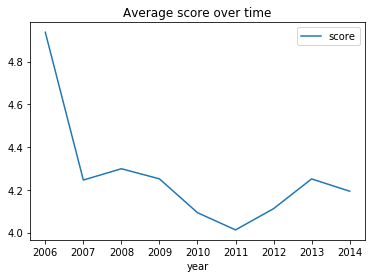

In [64]:
%matplotlib inline
avg_scores_table_f.set_index("year").plot(title="Average score over time")